                                               Optimization
                              Lab 3: Data regression: simple linear regression
                                          Alexandre Escolà Nixon

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


I originally did not realise that we had the datasets attached, so I got the data arrays already defined from a web page

In [29]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

### 2 Least squares

* #### 1. Graph each of the datasets and see how the samples are distributed. Making a plot of the dataset is commonly an important step to visually analyze the samples. You are recommended to perform it previous to any automatic analysis.

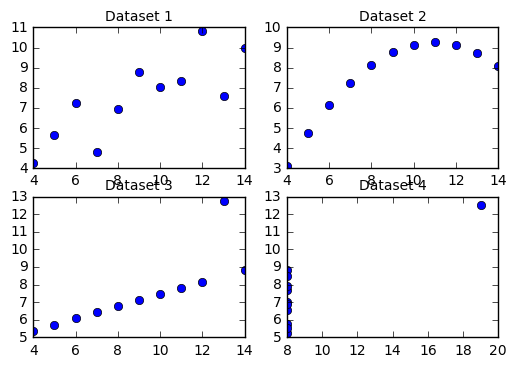

In [30]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot(x1, y1, "o")
plt.title('Dataset 1',size=10)

ax2 = fig.add_subplot(222)
ax2.plot(x2, y2, "o")
plt.title('Dataset 2',size=10)

ax3 = fig.add_subplot(223)
ax3.plot(x3, y3, "o")
plt.title('Dataset 3',size=10)

ax4 = fig.add_subplot(224)
ax4.plot(x4, y4, "o")
plt.title('Dataset 4',size=10)

* #### 2. For each of the dataset, compute the parameters $(b_0, b_1)^T$ using the least squares method. For that purpose you may use the closed solution. Plot the obtained line and see if it correctly fits the dataset. You will see that the least squares method is sensible to outliers. An outlier is a sample that markedly deviates from the other observations in the set.

In order to compute the optimal values of b, the closed solution to the least squares problem is used.

\begin{equation}
b=\left (A^TA \right)^{-1}A^Ty
\end{equation}

Here the different solutions for each dataset are calculated:

In [31]:
X1=reshape(x1,(len(x1),1))
uns=np.ones(len(X1))
uns=reshape(uns,(len(x1),1))
A1=np.concatenate((uns,X1),axis=1)
b1=np.dot(np.dot(inv(np.dot(A1.T,A1)),A1.T),y1)
b1=reshape(b1,(len(b1),1))

In [32]:
X2=reshape(x2,(len(x2),1))
uns=np.ones(len(X2))
uns=reshape(uns,(len(x2),1))
A2=np.concatenate((uns,X2),axis=1)
b2=np.dot(np.dot(inv(np.dot(A2.T,A2)),A2.T),y2)
b2=reshape(b2,(len(b2),1))

In [33]:
X3=reshape(x3,(len(x3),1))
uns=np.ones(len(X3))
uns=reshape(uns,(len(x3),1))
A3=np.concatenate((uns,X3),axis=1)
b3=np.dot(np.dot(inv(np.dot(A3.T,A1)),A3.T),y3)

In [34]:
X4=reshape(x4,(len(x4),1))
uns=np.ones(len(X4))
uns=reshape(uns,(len(x4),1))
A4=np.concatenate((uns,X4),axis=1)
b4=np.dot(np.dot(inv(np.dot(A4.T,A4)),A4.T),y4)

In [35]:
print "The obtained values are: b1=(%.3f,%.3f), b2=(%.3f,%.3f), b3=(%.3f,%.3f), b4=(%.3f,%.3f)" % (b1[0],
b1[1],b2[0],b2[1],b3[0],b3[1],b4[0],b4[1])

The obtained values are: b1=(3.000,0.500), b2=(3.001,0.500), b3=(3.002,0.500), b4=(3.002,0.500)


And with this code the lines described by the different solutions are plotted with the different datasets.

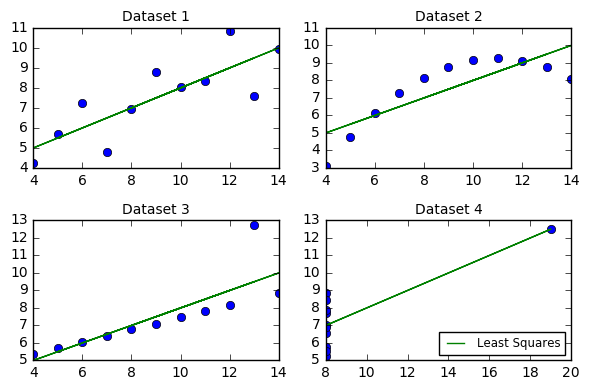

In [36]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot(x1, y1, "o")
sol=np.dot(A1,b1)
line1,=ax1.plot(x1,sol,'g')
plt.title('Dataset 1',size=10)

ax2 = fig.add_subplot(222)
ax2.plot(x2, y2, "o")
sol=np.dot(A2,b2)
line,=ax2.plot(x2,sol,'g')
plt.title('Dataset 2',size=10)

ax3 = fig.add_subplot(223)
ax3.plot(x3, y3, "o")
sol=np.dot(A3,b3)
line,=ax3.plot(x3,sol,'g')
plt.title('Dataset 3',size=10)

ax4 = fig.add_subplot(224)
ax4.plot(x4, y4, "o")
sol=np.dot(A4,b4)
line,=ax4.plot(x4,sol,'g')
plt.title('Dataset 4',size=10)

fig.tight_layout()
plt.legend([line1],["Least Squares"],prop={'size':8.5},loc=4)

As it can be seen the datasets are correctly fit. However, as mentioned in the exercise statement, the least squares method is sensible to outliers, leading to a possible poor fiting in the case of having an important amount of them.

### 3 Robust functions

* ##### 1. Plot the least squares function, $\rho(u)=\frac{1}{2}u^2$, and compare it with the Huber function, equation (2), in order to see the “importance” that is given to each prediction error u. You may, for instance, plot the function (u) for $\left | u \right | \leqslant 10$.

Here different robust methods are implemented in order to compensate the effect of outliers in the least squares method, where, given that least squares otopmization minimizes the sum of the squares of the residuals, the further a resifdual is from the data model the more influence it has. The idea is to use some other error function that replaces the tradicional squaring of the residuals with something that de-emphasises outliers. 

Here the least squares function, and the robust Huber and Cauchy functions are plotted. 

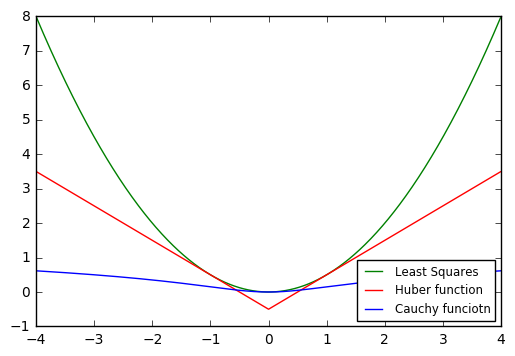

In [37]:
a=np.arange(-4,4,0.01)
c=1
b=1
Q_ls=0.5*a**2
Q_huber=0.5*c*(2*abs(a)-c)
Q_cauchy=(0.5*b**2)*log10(1+(a**2)/b**2)
plt.figure()
line1,=plt.plot(a,Q_ls,'g')
line2,=plt.plot(a,Q_huber,'r')
line3,=plt.plot(a,Q_cauchy,'b')
plt.legend([line1,line2,line3],["Least Squares", "Huber function","Cauchy funciotn"],prop={'size':8.5},loc=4)

As the plot shows, the Huber function does not grow to such high values with outliers as the Huber function does, as it grows more smoothely for values away from the minimum ( i.e the ideal fit ), resulting in a more robust method for cases where the data has outliers. The same applies for the Cauchy function but, where this robust behaviour is even more pronounced in this case, therefore using the Cauchy function as the function to minimize will result in a more appropiate model to fit our data when there are outliers.

* ##### 2. Compute the parameters $(b_0, b_1)^T$ using the Huber function. For thatissue you will need to use the Newton method (recall that you’ll need to use the gradient method if the Hessian is not positive definite). Plot the obtained line and and compare the result with the result you obtained with the least squares method.

\begin{equation}
\left\{\begin{matrix}
\frac{1}{2}e_i^2 & |e_i|\leq c\\ 
\frac{1}{2}c\left (2|e_i|-c \right) & |e_i|>c 
\end{matrix}\right.
\end{equation}

The gradient descent method has been used to find the global minima. In order to do so, the derivatives of the Huber function have been taken. Notice that the second term, that includes an absolute value, can be decomposed in two seperate cases.

The results can be compressed in the following expression, where each of the sumation terms is conditional to whether or not the instantaneous error is greater to a certain boundary c, which in this case it has been defined to be 1. For both derivatives the first terms are the derivation respect to the Least Suares function, and the two remaining ones to the second term of the previous expression.

\begin{equation}
\frac{\partial Q}{\partial b_0}=\sum_{if (|e_i|\leq c)}\left ( b_o+b_1 x_i-y_i\right) + \sum_{if (e_i>c)}c + \sum_{if (e_i<-c)}-c\\
\end{equation}
\begin{equation}
\frac{\partial Q}{\partial b_1}=\sum_{if (|e_i|\leq c)}\left ( b_o+b_1 x_i-y_i\right)x_i + \sum_{if (e_i>c)}cx_i + \sum_{if (e_i<-c)}-cx_i\\
\end{equation}

In [39]:
def grad_descent(x,y):
    alpha=1.0
    iterations=10000
    c=1
    b=np.zeros(2)
    j=1

    x_tmp=reshape(x,(len(x),1))
    uns=reshape(np.ones(len(x_tmp)),(len(x),1))
    A=np.concatenate((uns,x_tmp),axis=1)
    e=A.dot(b).T-y

    gradbx=sum(e*(abs(e)<=c))+sum(c*(e>c))+sum(-c*(e<-c))
    gradby=sum(e*((abs(e)<=c)*x))+sum(c*((e>c)*x))+sum(-c*((e<-c)*x))

    for i in range(iterations):

        # If true the minimum has been reached
        if alpha<1e-5:
            break

        b0_tmp=b[0]-alpha*gradbx
        b1_tmp=b[1]-alpha*gradby
        b_tmp=np.array([b0_tmp,b1_tmp])
        e_tmp=A.dot(b_tmp).T-y
        
        Z_tmp=sum((0.5)*(e_tmp**2)*(abs(e_tmp)<=c))+sum(0.5*c*(2*e_tmp-c)*(e_tmp>c))+sum(0.5*c*(-2*e_tmp-c)*(e_tmp<-c))
        Z=sum((0.5)*(e**2)*(abs(e)<=c))+sum(0.5*c*(2*e-c)*(e>c))+sum(0.5*c*(-2*e-c)*(e<-c))

        # Backtracking: Does the update reduce the value of the function?
        if Z_tmp<Z: 
            b[0]=b0_tmp
            b[1]=b1_tmp
            e=A.dot(b).T-y

            gradbx=sum(e*(abs(e)<=c))+sum(c*(e>c))+sum(-c*(e<-c))
            gradby=sum(e*(abs(e)<=c)*x)+sum(c*(e>c)*x)+sum(-c*(e<-c)*x)

            alpha=1.0
            j+=1
        else:
            alpha=alpha/2.0
            continue
    return b

Here the function is called to obtain the different solutions:

In [40]:
b1_h = grad_descent(x1,y1)
b2_h = grad_descent(x2,y2)
b3_h = grad_descent(x3,y3)
b4_h = grad_descent(x4,y4)
print "The obtained values are: b1=(%.3f,%.3f), b2=(%.3f,%.3f), b3=(%.3f,%.3f), b4=(%.3f,%.3f)" % (b1_h[0],
b1_h[1],b2_h[0],b2_h[1],b3_h[0],b3_h[1],b4_h[0],b4_h[1])

The obtained values are: b1=(2.963,0.508), b2=(3.074,0.512), b3=(3.575,0.406), b4=(2.989,0.503)


The values of b are similar to before, as expected, given that there arent too many outliers, and this fit will now give a minor contribution to outliers.

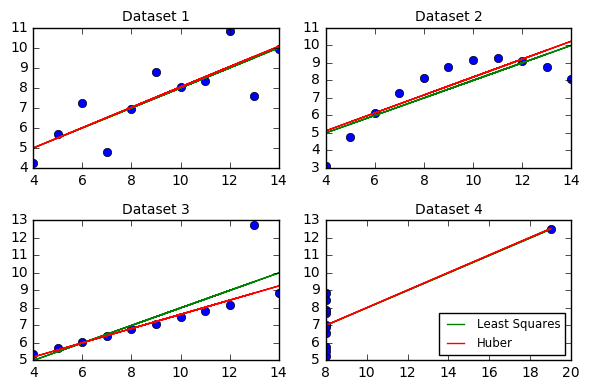

In [41]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot(x1, y1, "o")
sol=np.dot(A1,b1)
sol1=np.dot(A1,b1_h)
line1,=ax1.plot(x1,sol,'g')
line2,=ax1.plot(x1,sol1,'r')
plt.title('Dataset 1',size=10)

ax2 = fig.add_subplot(222)
ax2.plot(x2, y2, "o")
sol=np.dot(A2,b2)
sol2=np.dot(A2,b2_h)
line,=ax2.plot(x2,sol,'g')
line,=ax2.plot(x2,sol2,'r')
plt.title('Dataset 2',size=10)

ax3 = fig.add_subplot(223)
ax3.plot(x3, y3, "o")
sol=np.dot(A3,b3)
sol3=np.dot(A3,b3_h)
line,=ax3.plot(x3,sol,'g')
line,=ax3.plot(x3,sol3,'r')
plt.title('Dataset 3',size=10)

ax4 = fig.add_subplot(224)
ax4.plot(x4, y4, "o")
sol=np.dot(A4,b4)
sol4=np.dot(A4,b4_h)
line,=ax4.plot(x4,sol,'g')
line,=ax4.plot(x4,sol4,'r')
plt.title('Dataset 4',size=10)

fig.tight_layout()
plt.legend([line1,line2],["Least Squares", "Huber",],prop={'size':8.5},loc=4)

As it can be seen with the plot the outliers affect less the fit when the Huber function is used for the optimization problem, proving that it is more robust to this phenomena.

This can clearly be seen in the figure corresponding to dataset 3, where tnere is an outlier that is producing a pronounced deviation when the data is fit by the least squared minimization process, whereas when the Huber function is used this negative effect is clearly de-emphasised.

* ##### 3. If you want to perform more experiments, you may use other robust functions such as the Cauchy function,

Here the same function is used but with the Cauchy function implemented:

\begin{equation}
\rho(u)=\frac{b^2}{2} log\left [ 1+ \left ( \frac{u}{b} \right )^2 \right ]
\end{equation}

\begin{equation}
Q=\sum_{i=1}^{n}\rho(e_i)
\end{equation}

This function has already been plotted in section 3.1. It can be observed that it grows smoothly as it goes away from the minimum, more than with hte Huber function. Thus it would be expected that this function is even more robust to outliers.

The derivatives with respect to $b_0$ and $b_1$ are shown below

\begin{equation}
\frac{\partial Q}{\partial b_0}=\sum_{i=1}^{n}\left ( 1+\left ( \frac{e_i}{b} \right )^2 \right )^{-1}·e_i\\
\end{equation}
\begin{equation}
\frac{\partial Q}{\partial b_1}=\sum_{i=1}^{n}\left ( 1+\left ( \frac{e_i}{b} \right )^2 \right )^{-1}·e_i·x_i\\ 
\end{equation}


Here the same function as before is used but changing the terms to minimize the Cauchy function

In [26]:
def grad_descent_cauchy(x,y):
    alpha=1.0
    iterations=10000
    c=1
    a=1.
    b=np.zeros(2)+0.1
    j=1

    x_tmp=reshape(x,(len(x),1))
    uns=reshape(np.ones(len(x_tmp)),(len(x),1))
    A=np.concatenate((uns,x_tmp),axis=1)
    e=A.dot(b).T-y

    gradbx=sum(((1+(e/a)**2)**(-1))*e)
    gradby=sum(((1+(e/a)**2)**(-1))*e*x)

    for i in range(iterations):

        # If true the minimum has been reached
        if alpha<1e-5:
            break

        b0_tmp=b[0]-alpha*gradbx
        b1_tmp=b[1]-alpha*gradby
        b_tmp=np.array([b0_tmp,b1_tmp])
        e_tmp=A.dot(b_tmp).T-y

        Z_tmp=sum((0.5*a**2) *log10(1+(e_tmp**2)/a**2))
        Z=sum((0.5*a**2) *log10(1+(e**2)/a**2))

        # Backtracking: Does the update reduce the value of the function?
        if Z_tmp<Z: 
            #print "Gradient descent in step %d at (%.2f %.2f)" %(j, b1[0], b1[1])
            b[0]=b0_tmp
            b[1]=b1_tmp
            e=A.dot(b).T-y

            gradbx=sum(((1+(e/a)**2)**(-1))*e)
            gradby=sum(((1+(e/a)**2)**(-1))*e*x)
            
            alpha=1.0
            j+=1
        else:
            alpha=alpha/2.0
            continue
    return b

In [27]:
b1_cauchy = grad_descent_cauchy(x1,y1)
b2_cauchy = grad_descent_cauchy(x2,y2)
b3_cauchy = grad_descent_cauchy(x3,y3)
b4_cauchy = grad_descent_cauchy(x4,y4)
print "The obtained values are: b1=(%.3f,%.3f), b2=(%.3f,%.3f), b3=(%.3f,%.3f), b4=(%.3f,%.3f)" % (b1_cauchy[0]
,b1_cauchy[1],b2_cauchy[0],b2_cauchy[1],b3_cauchy[0],b3_cauchy[1],b4_cauchy[0],b4_cauchy[1])

The obtained values are: b1=(2.878,0.513), b2=(3.069,0.531), b3=(3.840,0.366), b4=(2.933,0.506)


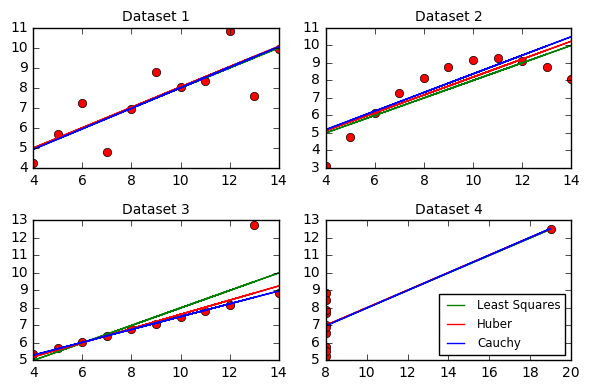

In [28]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot(x1, y1, "ro")
sol=np.dot(A1,b1)
sol1=np.dot(A1,b1_h)
sol11=np.dot(A1,b1_cauchy)
line1,=ax1.plot(x1,sol,'g')
line2,=ax1.plot(x1,sol1,'r')
line3,=ax1.plot(x1,sol11,'b')
plt.title('Dataset 1',size=10)

ax2 = fig.add_subplot(222)
ax2.plot(x2, y2, "ro")
sol=np.dot(A2,b2)
sol2=np.dot(A2,b2_h)
sol22=np.dot(A2,b2_cauchy)
line1,=ax2.plot(x2,sol,'g')
line2,=ax2.plot(x2,sol2,'r')
line3,=ax2.plot(x2,sol22,'b')
plt.title('Dataset 2',size=10)

ax3 = fig.add_subplot(223)
ax3.plot(x3, y3, "ro")
sol=np.dot(A3,b3)
sol3=np.dot(A3,b3_h)
sol33=np.dot(A3,b3_cauchy)
line1,=ax3.plot(x3,sol,'g')
line2,=ax3.plot(x3,sol3,'r')
line3,=ax3.plot(x3,sol33,'b')
plt.title('Dataset 3',size=10)

ax4 = fig.add_subplot(224)
ax4.plot(x4, y4, "ro")
sol=np.dot(A4,b4)
sol4=np.dot(A4,b4_h)
sol44=np.dot(A4,b4_cauchy)
line1,=ax4.plot(x4,sol,'g')
line2,=ax4.plot(x4,sol4,'r')
line3,=ax4.plot(x4,sol44,'b')
plt.title('Dataset 4',size=10)

fig.tight_layout()
plt.legend([line1,line2,line3],["Least Squares", "Huber","Cauchy"],prop={'size':8.5},loc=4)

As results show, the data fit obtained by minimizing the Cauchy function is very similar to the one obtained with the Huber function. It can be appreciated in the Dataset 3 fit, how it even less sensible to outliers than the Huber function (for a b = 1), this effect however is berely appreciated in this case given that there is only an outlier, therefore the original fit with the closed solution of the least squares was not as deviated from the ideal fit, but in cases where outliers do become an important negative effect, it would clearly result convenient to considerate using robust methods like the ones implemented in this practical session.